<h1>Hand On Exam</h1>
<hr>
<h3>TRISH-ANNE P. HUIDEM</h3>
<h3>BSIT-3B</h3>

<h6>
<strong>Data Visualization: Provide Visualization each Insights.</strong>
</h6>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns

In [2]:
crimes = pd.read_csv('Datasets\\chicago_2001_present.csv')

In [3]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,12131221,JD327000,08/10/2020 09:45:00 AM,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,1.0,24.0,03,1162795.0,1909900.0,2020,05/17/2025 03:40:52 PM,41.908418,-87.677407,"(41.908417822, -87.67740693)"
3,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410193,13973682,JJ422722,09/20/2025 09:30:00 PM,060XX N ARTESIAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,40.0,2.0,07,1158892.0,1940132.0,2025,09/28/2025 03:42:59 PM,41.991457,-87.690912,"(41.99145724, -87.690912186)"
8410194,13973492,JJ422488,09/20/2025 11:30:00 PM,004XX N PEORIA ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,24.0,07,1170336.0,1902935.0,2025,09/28/2025 03:42:59 PM,41.889144,-87.649909,"(41.889143855, -87.649909004)"
8410195,13973306,JJ422245,09/20/2025 07:08:00 PM,107XX S PRAIRIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,9.0,49.0,08A,1179819.0,1833810.0,2025,09/28/2025 03:42:59 PM,41.699246,-87.617199,"(41.699245987, -87.61719874)"
8410196,13973002,JJ422001,09/20/2025 03:55:00 PM,034XX W 63RD ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,14.0,66.0,18,1154582.0,1862632.0,2025,09/28/2025 03:42:59 PM,41.778877,-87.708840,"(41.778877155, -87.708840106)"


In [4]:
crimes.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
dtype: int64

In [5]:
crimes.info

<bound method DataFrame.info of                ID Case Number                    Date  \
0        13311263    JG503434  07/29/2022 03:39:00 AM   
1        13053066    JG103252  01/03/2023 04:44:00 PM   
2        12131221    JD327000  08/10/2020 09:45:00 AM   
3        11227634    JB147599  08/26/2017 10:00:00 AM   
4        13203321    JG415333  09/06/2023 05:00:00 PM   
...           ...         ...                     ...   
8410193  13973682    JJ422722  09/20/2025 09:30:00 PM   
8410194  13973492    JJ422488  09/20/2025 11:30:00 PM   
8410195  13973306    JJ422245  09/20/2025 07:08:00 PM   
8410196  13973002    JJ422001  09/20/2025 03:55:00 PM   
8410197  13972730    JJ421679  09/20/2025 08:20:00 AM   

                           Block  IUCR                Primary Type  \
0                023XX S TROY ST  1582  OFFENSE INVOLVING CHILDREN   
1        039XX W WASHINGTON BLVD  2017                   NARCOTICS   
2              015XX N DAMEN AVE  0326                     ROBBERY   
3  

In [6]:
crimes['Date'] = crimes['Date'].astype(str)
crimes['Date'] = crimes['Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
crimes['Date'] = crimes['Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)                                
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst=True, errors='coerce')

crimes.dtypes
crimes.isnull().sum()

crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] =  crimes['Date'].dt.month
crimes['Day'] =  crimes['Date'].dt.day
crimes['DayOfWeek'] =  crimes['Date'].dt.dayofweek
crimes.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
Month                        0
Day                          0
DayOfWeek                    0
dtype: int64

In [7]:
crimes['Date'] = crimes['Date'].astype('str')
crimes['Date'] = crimes['Date'].str.strip()
crimes['Date'] = crimes['Date'].str.replace('/', '-')

In [8]:
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst = True, errors = 'coerce')

In [9]:
crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

<h1>INSIGHTS - 35</h1>

<h3>Question 1 - Do crimes spike during certain months (like summer vs winter?)</h3>

In [10]:
crimes['Month'] = crimes['Date'].dt.month
monthly_trends = crimes.groupby('Month').size().reset_index(name='Number of Crimes')
monthly_trends

,Month,Number of Crimes
0,1,661245
1,2,584438
2,3,691342
3,4,688252
4,5,748780
5,6,748862
6,7,787986
7,8,778827
8,9,727097
9,10,722062


<hr>
<h3>Question 2 - Which crimes are most likely to result in an arrest?</h3>

In [11]:
arrest_rate_by_type = crimes.groupby('Primary Type')['Arrest'].mean().reset_index()
arrest_rate_by_type.sort_values('Arrest', ascending=False).head(10)

,Primary Type,Arrest
10,DOMESTIC VIOLENCE,1.000000
25,PROSTITUTION,0.995583
19,NARCOTICS,0.993468
11,GAMBLING,0.992703
17,LIQUOR LAW VIOLATION,0.990115
26,PUBLIC INDECENCY,0.981395
4,CONCEALED CARRY LICENSE VIOLATION,0.965707
14,INTERFERENCE WITH PUBLIC OFFICER,0.916336
21,OBSCENITY,0.738947
33,WEAPONS VIOLATION,0.725967


<hr>
<h3>Question 3 - Which street blocks have the highest concentration of crimes?</h3>

In [12]:
top_blocks = crimes['Block'].value_counts().head(10).reset_index()
top_blocks.columns = ['Block', 'Number of Crimes']
top_blocks

,Block,Number of Crimes
0,100XX W OHARE ST,16939
1,001XX N STATE ST,16909
2,076XX S CICERO AVE,10788
3,0000X N STATE ST,10150
4,008XX N MICHIGAN AVE,9733
5,0000X W TERMINAL ST,7763
6,064XX S DR MARTIN LUTHER KING JR DR,6460
7,063XX S DR MARTIN LUTHER KING JR DR,5930
8,023XX S STATE ST,5340
9,001XX W 87TH ST,4935


<hr>
<h3>Question 4 - Which police districts report the highest number of arrests?</h3>

In [13]:
district_arrests = (crimes[crimes['Arrest'] == True].groupby('District').size().reset_index(name='Number of Arrests').sort_values('Number of Arrests', ascending=False).head(5))

district_arrests

,District,Number of Arrests
10,11.0,219302
13,15.0,134296
6,7.0,130255
22,25.0,124489
7,8.0,123331


<hr>
<h3>Question 5 - Has crime overall increased or decreased over the years?</h3>

In [14]:
crimes['Year'] = crimes['Date'].dt.year
yearly_crimes = crimes.groupby('Year').size().reset_index(name='Number of Crimes')
yearly_crimes = yearly_crimes.sort_values('Year')
yearly_crimes

,Year,Number of Crimes
0,2001,485954
1,2002,486830
2,2003,475996
3,2004,469439
4,2005,453785
5,2006,448198
6,2007,437105
7,2008,427211
8,2009,392859
9,2010,370555


<hr>
<h3>Question 6 - Which crime types are the least common?</h3>

In [15]:
least_crimes = (crimes['Primary Type'].value_counts().reset_index().tail(10))
least_crimes.columns = ['Primary Type', 'Number of Crimes']
least_crimes

,Primary Type,Number of Crimes
24,STALKING,6115
25,INTIMIDATION,5088
26,CONCEALED CARRY LICENSE VIOLATION,1633
27,OBSCENITY,950
28,PUBLIC INDECENCY,215
29,OTHER NARCOTIC VIOLATION,163
30,HUMAN TRAFFICKING,137
31,NON-CRIMINAL,26
32,RITUALISM,24
33,DOMESTIC VIOLENCE,1


<hr>
<h3>Question 7 - Where do stalking crimes most often occur in Chicago?</h3>

In [16]:
stalking_crimes = crimes[crimes['Primary Type'] == 'STALKING']
stalking_places = (stalking_crimes['Location Description'].value_counts().reset_index().head(10))
stalking_places.columns = ['Location', 'Number of Stalking Crimes']
stalking_places

,Location,Number of Stalking Crimes
0,RESIDENCE,1578
1,STREET,1356
2,APARTMENT,1257
3,SIDEWALK,397
4,OTHER,192
5,RESTAURANT,104
6,COMMERCIAL / BUSINESS OFFICE,97
7,RESIDENCE PORCH/HALLWAY,89
8,PARKING LOT/GARAGE(NON.RESID.),59
9,ALLEY,57


<hr>
<h3>Question 8 - Which blocks have the most stalking crimes with no arrests?</h3>

In [17]:
stalking_block = crimes[(crimes['Primary Type'] == 'STALKING') & (crimes['Arrest'] == False)]

stalking_block_counts = (stalking_block['Block'].value_counts().reset_index().head(10))
stalking_block_counts.columns = ['Block', 'Unsolved Stalking Cases']
stalking_block_counts

,Block,Unsolved Stalking Cases
0,013XX S THROOP ST,14
1,019XX N OAK PARK AVE,11
2,100XX W OHARE ST,11
3,007XX E 111TH ST,9
4,021XX N MAJOR AVE,9
5,001XX N STATE ST,8
6,032XX W POLK ST,8
7,029XX S DEARBORN ST,6
8,012XX W ELMDALE AVE,6
9,032XX W LAWRENCE AVE,6


<hr>
<h3>Question 9 - Do the police always catch robbers?</h3>

In [18]:
robberies = crimes[crimes['Primary Type'] == 'ROBBERY']
robbery_outcomes = robberies['Arrest'].value_counts().reset_index()
robbery_outcomes.columns = ['Arrest Made', 'Number of Cases']
robbery_outcomes

,Arrest Made,Number of Cases
0,False,285202
1,True,29084


<hr>
<h3>Question 10 - What kinds of stealing-related crimes happen most often?</h3>

In [19]:
theft_count = crimes[crimes['Primary Type'] == 'THEFT'].shape[0]
robbery_count = crimes[crimes['Primary Type'] == 'ROBBERY'].shape[0]
burglary_count = crimes[crimes['Primary Type'] == 'BURGLARY'].shape[0]
stealing_counts = pd.DataFrame({'Crime Type': ['THEFT', 'ROBBERY', 'BURGLARY'],'Number of Cases': [theft_count, robbery_count, burglary_count]})
stealing_counts

,Crime Type,Number of Cases
0,THEFT,1785150
1,ROBBERY,314286
2,BURGLARY,444757


<hr>
<h3>Question 11 - Among the top 5 crime categories, what share of reported cases ended in an arrest?</h3>

In [24]:
soft_colors = ["#FFB6C1", "#FF69B4", "#FFC0CB", "#FFDAB9", "#E6E6FA", "#FFFACD", "#D8BFD8", "#F5DEB3"]

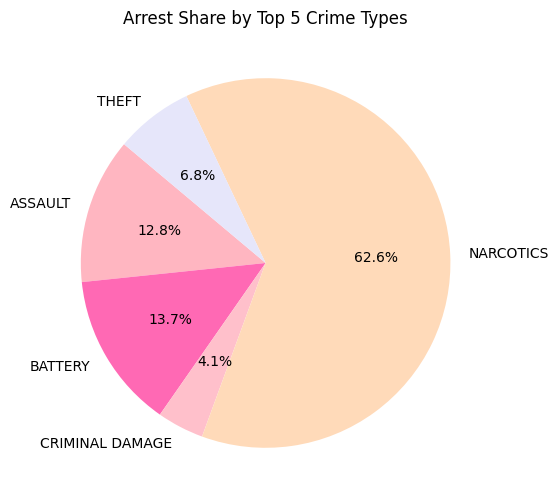

In [25]:
top5_types = crimes['Primary Type'].value_counts().head(5).index
arrest_share = crimes[crimes['Primary Type'].isin(top5_types)].groupby('Primary Type')['Arrest'].mean()

plt.figure(figsize=(6,6))
plt.pie(arrest_share, labels=arrest_share.index, autopct='%1.1f%%', startangle=140, colors=soft_colors)
plt.title("Arrest Share by Top 5 Crime Types")
plt.show()

<hr>
<h3>Question 12 - Where do most domestic crimes occur?</h3>

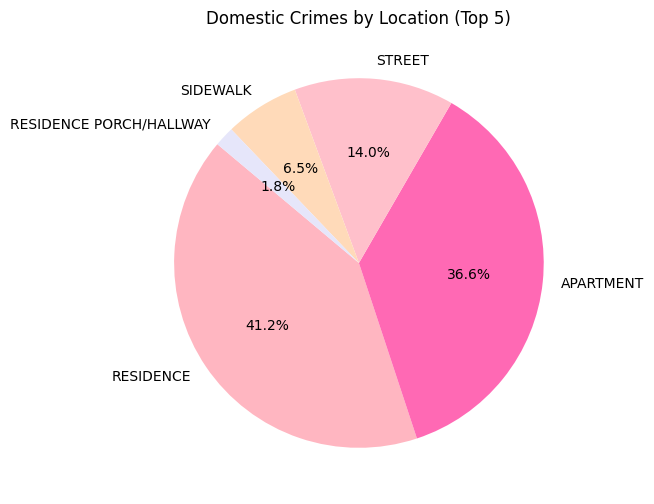

In [27]:
domestic_locations = crimes[crimes['Domestic'] == True].groupby('Location Description').size().nlargest(5)

plt.figure(figsize=(6,6))
plt.pie(domestic_locations, labels=domestic_locations.index, autopct='%1.1f%%', startangle=140, colors=soft_colors)
plt.title("Domestic Crimes by Location (Top 5)")
plt.show()

<hr>
<h3>Question 13 - What proportion of crimes happen in the morning, afternoon, evening, and night?</h3>

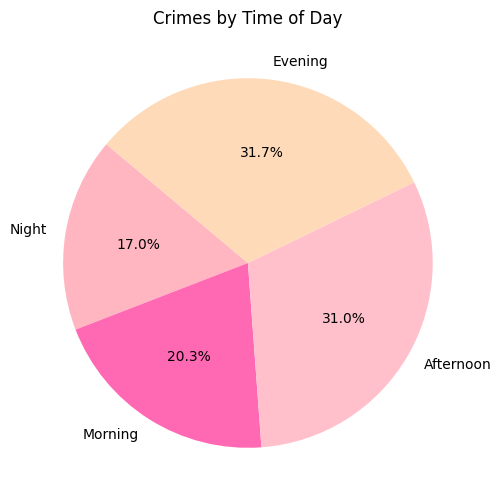

In [29]:
crimes['Hour'] = crimes['Date'].dt.hour
time_bins = pd.cut(crimes['Hour'], bins=[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'], right=False)
time_share = time_bins.value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(time_share, labels=time_share.index, autopct='%1.1f%%', startangle=140, colors=soft_colors)
plt.title("Crimes by Time of Day")
plt.show()

<hr>
<h3>Question 14 - In latest year, what share of cases ended in arrests vs. no arrests?</h3>

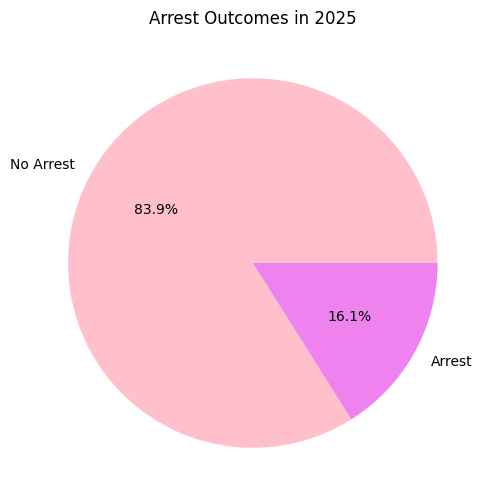

In [32]:
arrest_by_year = crimes.groupby([crimes['Date'].dt.year, 'Arrest']).size().unstack(fill_value=0)

latest_year = arrest_by_year.index.max()
arrest_share_year = arrest_by_year.loc[latest_year]

plt.figure(figsize=(6,6))
plt.pie(arrest_share_year, labels=['No Arrest','Arrest'], autopct='%1.1f%%', colors=['Pink','violet'])
plt.title(f"Arrest Outcomes in {latest_year}")
plt.show()

<hr>
<h3>Question 15 - For Theft cases only, what are the top 5 locations where they occur?</h3>

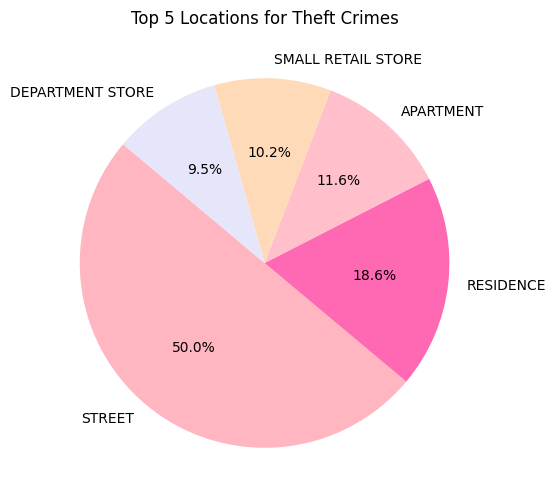

In [34]:
theft_locations = crimes[crimes['Primary Type'] == 'THEFT'].groupby('Location Description').size().nlargest(5)

plt.figure(figsize=(6,6))
plt.pie(theft_locations, labels=theft_locations.index, autopct='%1.1f%%', startangle=140, colors=soft_colors)
plt.title("Top 5 Locations for Theft Crimes")
plt.show()

<hr>
<h3>Question 16 - Which columns have the highest number of missing values?</h3>

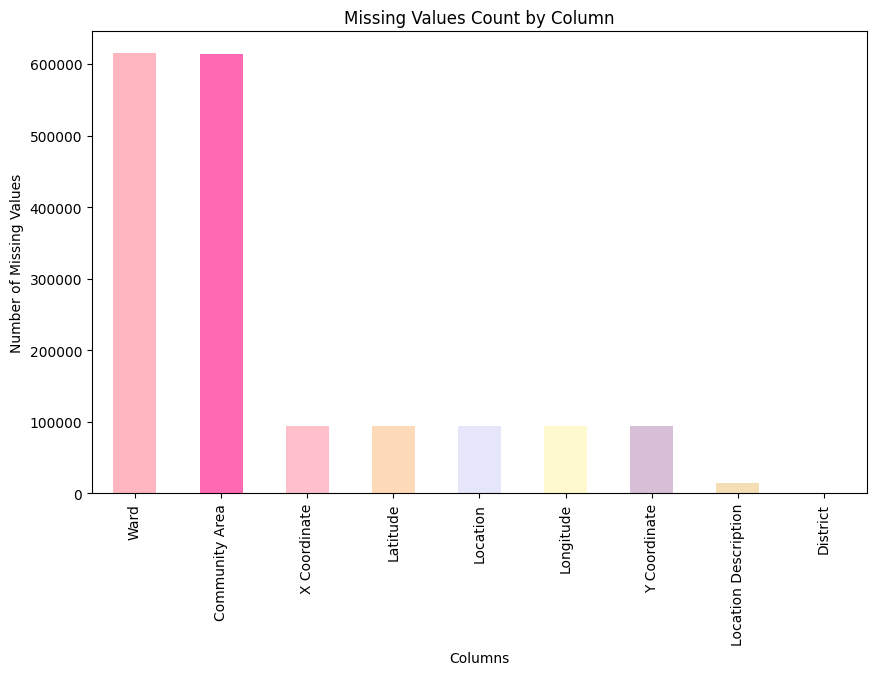

In [35]:
missing_counts = crimes.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(10,6))
missing_counts.plot(kind='bar', color=soft_colors)
plt.title("Missing Values Count by Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

<hr>
<h3>Question 17 - Are arrests more common in records with a valid Location Description compared to those with missing ones?</h3>

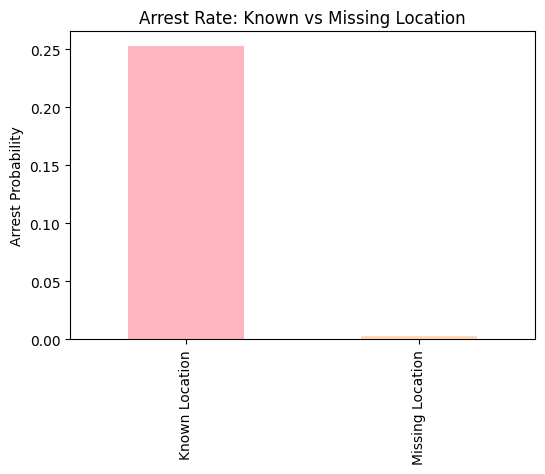

In [37]:
arrest_location = crimes.groupby(crimes['Location Description'].isnull())['Arrest'].mean()

arrest_location.index = ['Known Location','Missing Location']

arrest_location.plot(kind='bar', color=["#FFB6C1","#FFDAB9"], figsize=(6,4))
plt.title("Arrest Rate: Known vs Missing Location")
plt.ylabel("Arrest Probability")
plt.show()

<hr>
<h3>Question 18 - Do missing District values cluster in certain years?</h3>

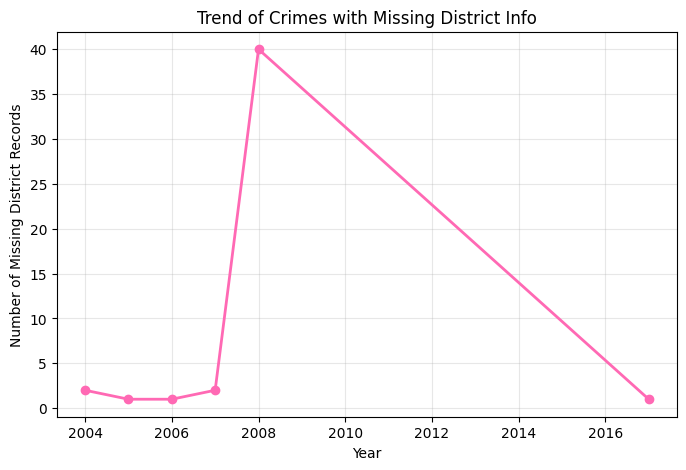

In [38]:
missing_district_trend = crimes[crimes['District'].isnull()].groupby('Year').size()

missing_district_trend.plot(marker='o', color="#FF69B4", linewidth=2, figsize=(8,5))
plt.title("Trend of Crimes with Missing District Info")
plt.ylabel("Number of Missing District Records")
plt.grid(alpha=0.3)
plt.show()

<hr>
<h3>Question 19 - What’s the difference in arrest rates between crimes with valid coordinates vs missing ones?</h3>

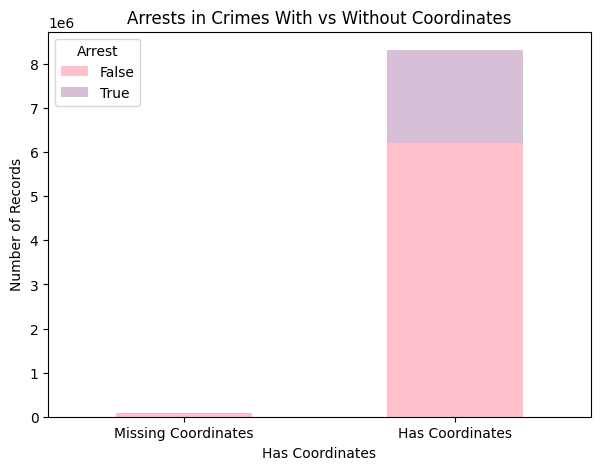

In [40]:
crimes['Has Coordinates'] = crimes['Latitude'].notnull()
coord_arrest = crimes.groupby('Has Coordinates')['Arrest'].value_counts().unstack().fillna(0)

coord_arrest.plot(kind='bar', stacked=True, figsize=(7,5), color=["#FFC0CB","#D8BFD8"])
plt.title("Arrests in Crimes With vs Without Coordinates")
plt.ylabel("Number of Records")
plt.xticks([0,1], ["Missing Coordinates","Has Coordinates"], rotation=0)
plt.show()

<hr>
<h3>Question 20 - Which top crimes are most often missing Ward data?</h3>

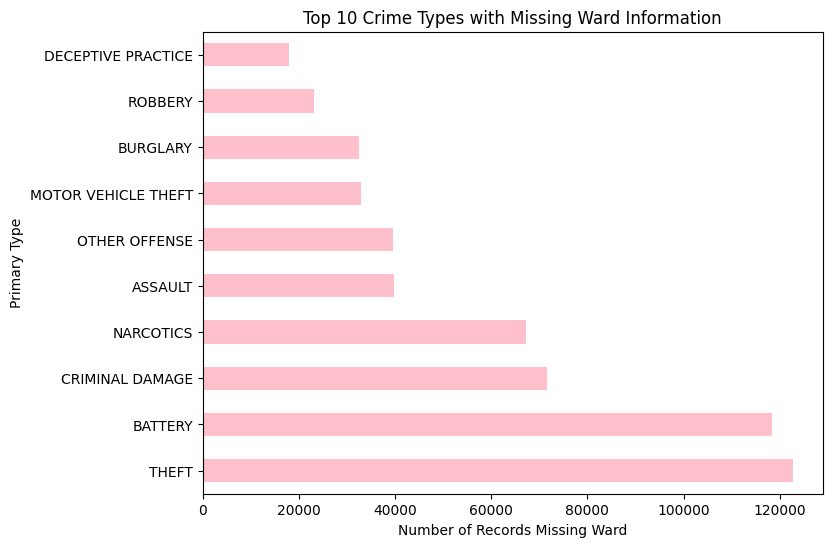

In [43]:
ward_missing_types = crimes[crimes['Ward'].isnull()]['Primary Type'].value_counts().head(10)

ward_missing_types.plot(kind='barh', color="pink", figsize=(8,6))
plt.title("Top 10 Crime Types with Missing Ward Information")
plt.xlabel("Number of Records Missing Ward")
plt.show()